## The quality of milk 🥛 is of utmost importance in the dairy industry as it directly affects consumer health and satisfaction. Accurate and timely prediction of milk quality can assist dairy farmers, processors, and regulators in maintaining high standards, ensuring product safety, and optimizing production processes.
### In this project, we explore the application of machine learning techniques to predict the quality of milk. The dataset used for this analysis was obtained from Kaggle, a popular platform for data science competitions and datasets. The dataset contains various features related to milk production such as pH, Taste, Odor, Fat etc

In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier  
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt

Importing Dataset

In [2]:
df=pd.read_csv('milkdata.csv')

In [3]:
df.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


Displaying total No of samples from each class

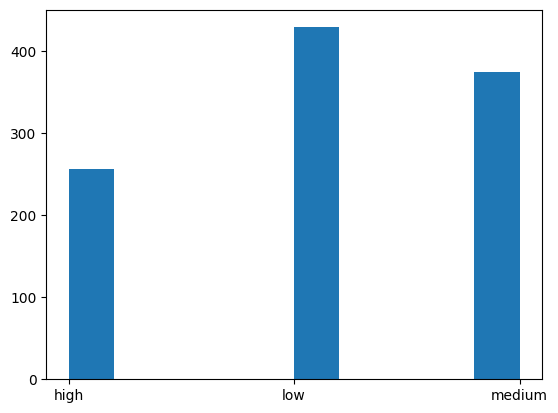

In [4]:
plt.hist(df['Grade'])
plt.show()

Converting categorical data to numerical data

In [5]:
codes={"high":3,"medium":2,"low":1}

In [6]:
df['Grade'].replace(codes,inplace=True)

Performing Feature Scaling Here

In [7]:
scaler=MinMaxScaler()
df[['pH','Temprature','Colour']]=scaler.fit_transform(df[['pH','Temprature','Colour']])

In [8]:
X=df.drop('Grade',axis=1)
Y=df['Grade']

Splitting data for training and testing 

In [9]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.20,random_state=42)

Using Logistic Regression as our Classification algorithm

In [10]:
logisticRegr = LogisticRegression()

In [11]:
logisticRegr.fit(x_train, y_train)

LogisticRegression()

In [12]:
y_pred= logisticRegr.predict(x_test)
print(metrics.accuracy_score(y_test, y_pred))

0.7641509433962265


Accuracy is too low! Let's Try any other algorithm

Using DecisionTreeClassifier as our classification algorithm

In [13]:
classifier= DecisionTreeClassifier()

In [14]:
classifier.fit(x_train,y_train)

DecisionTreeClassifier()

In [15]:
y_pred= classifier.predict(x_test)
print(metrics.accuracy_score(y_test, y_pred))

0.9905660377358491


Plotting Confusion matrix to check how many prediction are correct and incorrect per class

In [16]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

In [17]:

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [3, 2,1])

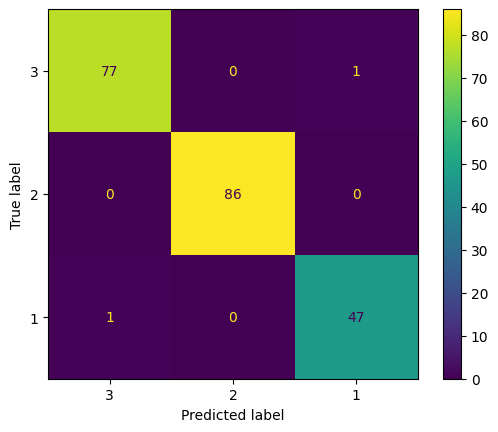

In [18]:
cm_display.plot()